# Data Training in CUG Step.10th ,2018

In [3]:
import sqlite3
conn = sqlite3.connect('OTAcatch_20170301_携程.db')
cur = conn.cursor()
# 获取sqlite数据库中的表名称，无需下载什么navicate
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
table = cur.fetchall()
table

[]

In [4]:
sql = 'select chinaCity,DepartureCityName,destination,DestinationName,Name,Tags,Count from item'
cur.execute(sql)
data = cur.fetchall()
import pandas as pd
# df = pd.DataFrame(data = data,columns = ['chinaCity','DepartureCityName','destination','DestinationName','Name','Tags','Count'])
# df.to_csv('xiecheng.csv',header = True,sep = ',')

OperationalError: no such table: item

In [7]:
import pandas as pd
df = pd.read_csv('xiecheng.csv',encoding = 'gbk',header = 0)
def trans(x):
    if type(x) == 'bytes':
        return x.decode()
    else:
        return eval(x).decode()
def str2int(x):
    if type(x) == str:
        return int(x)
df['DepartureCityName'] = df['DepartureCityName'].apply(trans)
df['Name'] = df['Name'].apply(trans)
df['Tags'] = df['Tags'].apply(trans)
df['Count'] = df['Count'].apply(trans)
df['Count'] = df['Count'].apply(str2int)
df['DestinationName'] = df['DestinationName'].apply(trans)
df.head()

,Unnamed: 0,chinaCity,DepartureCityName,destination,DestinationName,Name,Tags,Count
0,0,北京,北京,欧洲,慕尼黑,德国+法国+瑞士+意大利13日跟团游·一价全含 登埃菲尔+金色山口 双宫双游船,古堡之旅;雪山之旅;小镇风光;欧铁体验;博物馆,6
1,1,北京,北京,欧洲,罗马,意大利+德国+瑞士+法国12日10晚跟团游(4钻)·深度德国 法兰克福 新天鹅堡 THE MALL,;古堡之旅;博物馆;可升舱;奥特莱斯,8
2,2,北京,北京,欧洲,雅典,希腊雅典+爱琴海+米科诺斯镇+圣托里尼+伯罗奔尼撒10日8晚跟团游(4钻)·浪漫蜜月 雅典升...,;蜜月游;充足自由时间;小镇风光;博物馆,52
3,3,北京,北京,欧洲,爱丁堡,英国伦敦+爱丁堡+巴斯+曼彻斯特+温莎+格拉斯米尔湖+约克12日10晚私家团(4钻)·英伦下...,古堡之旅;温泉;博物馆;奥特莱斯,0
4,4,北京,北京,欧洲,布达佩斯,美食之旅·匈牙利+奥地利+斯洛伐克+捷克中波希米亚12日10晚跟团游(4钻)·携程自营 CK...,春季旅游节;;世界遗产;古堡之旅;温泉;可升舱,146


In [19]:
# 统计缺失值情况
def num_missing(x):
    return sum(x.isnull())
df.apply(num_missing)

Unnamed: 0           0
chinaCity            0
DepartureCityName    0
destination          0
DestinationName      0
Name                 0
Tags                 0
Count                0
dtype: int64

In [33]:
# 数据透视表
import numpy as np
df.pivot_table(index = ['DepartureCityName','destination'],values = ['Count'],aggfunc = np.sum)

Count
DepartureCityName destination       
                  中东非洲            15
                  加拿大             83
                  印度尼西亚           44
                  台湾            3324
                  新加坡           3253
                  日本            1096
                  柬埔寨           1312
                  欧洲             973
                  泰国            3381
                  澳新             280
                  美国             263
                  越南             357
                  韩国            1628
                  香港            1952
                  马尔代夫            36
                  马来西亚          2434
null              加拿大              0
                  印度尼西亚            0
                  新加坡              0
                  日本               0
                  澳新               0
                  越南               0
                  韩国               0
                  香港               0
                  马尔代夫             0
                  马来西亚             0
万州                韩国               0
                  马来西亚             0
万鸦老               印度尼西亚            0
上海                中东非洲         33482
...                              ...
高雄                台湾              16
魁北克               加拿大              0
鹤壁                韩国               0
                  马来西亚             0
鹿儿岛               日本               0
黄冈                印度尼西亚            0
                  新加坡              0
                  日本               0
                  柬埔寨              0
                  越南               0
                  韩国               0
                  马来西亚             0
黄山                韩国               0
                  马来西亚             0
黄石                印度尼西亚            0
                  台湾               0
                  新加坡              0
                  日本               0
                  柬埔寨              0
                  泰国               2
                  越南               0
                  韩国               0
                  马来西亚             0
黄金海岸              澳新             477
黑河                欧洲              58
齐齐哈尔              韩国               0
                  马来西亚             0
龙岩                马来西亚             0
龙目岛               印度尼西亚            0
龟岛                泰国               0

[1419 rows x 1 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc274c6c438>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc274c6ccf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc274c6c2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc274c78588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc274c789b0>],
 'means': []}

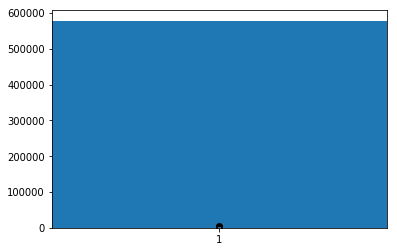

In [19]:
import matplotlib.pyplot as plt
fig ,ax = plt.subplots()
ax.hist(df['Count'].values)
ax.boxplot(df['Count'].values)